In [1]:
# Image
from IPython import display

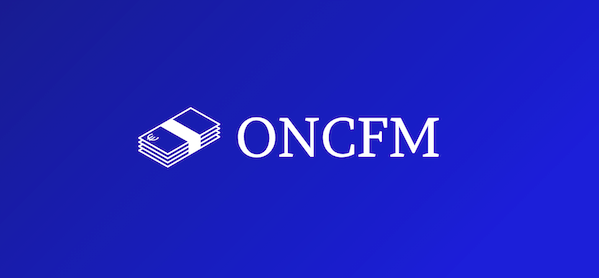

In [2]:
display.Image('./LOGO.png')

# <span style='color:blue'>**Régression_Logistique**</span>

Méthode de classification pour des variables binaires permettant de modéliser la probabilité d'appartenance à une. C'est un modèle de classification supervisé.

# Librairies

In [3]:
# Librairies data
import pandas as pd
import numpy as np

# Librairies graphiques
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

# Librairies d'analyse
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

#Warning
import warnings
warnings.filterwarnings('ignore')

# Importation des données

In [4]:
# Importation du fichier
billet_regLog = pd.read_csv('billet_ad.csv')
# Résultat
billet_regLog.head()

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
# Suppression de la colonne 'Unnamed: 0'
billet_regLog = billet_regLog.drop(columns={'Unnamed: 0'})
# Résultat
billet_regLog.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
# Dimensions
billet_regLog.shape

(1500, 7)

In [7]:
# Informations
billet_regLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# Régression logistique

In [8]:
# Initialisation des valeurs explicatives
data = billet_regLog[['diagonal','height_left','margin_up', 'margin_low', 'length','height_right']]
# Initialisation de la cible
target = billet_regLog['is_genuine']

## Conservation des variables significatives

Je recherche les variables non significatives afin de les supprimer avec l'algorithme RFE de scikit learn. Cela permet de ne pas nuire à la qualité de prédiction du modèle.

In [9]:
# Importation de l'outil
from sklearn.feature_selection import RFE

In [10]:
# Création d'une instance de la classe
lr = LogisticRegression(solver='newton-cg')
# Algorithme de sélection de variables
selecteur = RFE(estimator=lr)

In [11]:
# Lancement de la recherche
sol = selecteur.fit(data, target)

In [12]:
# Nombre de variables sélectionnées
print(sol.n_features_)

3


In [13]:
# Liste des variables sélectionnées
print(sol.support_)

[False False  True  True  True False]


In [14]:
# Ordre de suppression
print(sol.ranking_)

[4 3 1 1 1 2]


Les variables sélectionnées sont :
- margin_up
- margin_low
- length

*les variables supprimées correspondent aux coefficients les plus faibles en valeur absolue*

In [15]:
# Réduction du df aux variables sélectionnées
data_new = data[['margin_up','margin_low','length']]
data_new.shape

(1500, 3)

## Séparation du jeu de données

Je sépare mon jeu de données en 2 parties pour avoir un jeu d'entraînement et un jeu de test avec respectivement 80% et 20% du jeu initial des données.

In [16]:
# Séparation du jeu de données en 80/20
xtrain, xtest, ytrain, ytest = train_test_split(data_new, target, test_size=0.2)

In [17]:
# Comptage des modalité de y dans le jeu d'entrainement
print('Jeu de données d\'entraînement\n',ytrain.value_counts())

Jeu de données d'entraînement
 True     799
False    401
Name: is_genuine, dtype: int64


In [18]:
# Comptage des modalités de y dans le jeu test
print('Jeu de données test\n',ytest.value_counts())

Jeu de données test
 True     201
False     99
Name: is_genuine, dtype: int64


In [19]:
# Export des données d'entraînement
xtrain.to_csv('xtrain_regLog.csv')
ytrain.to_csv('ytrain_regLog.csv')

## Lancement de la régression logistique

In [20]:
# Régression logistique 
lr = LogisticRegression(penalty='none')
res = lr.fit(xtrain,ytrain)

In [21]:
# Résultat
pd.DataFrame({'variables':xtrain.columns,'coef':lr.coef_[0]})

,variables,coef
0,margin_up,-9.226480
1,margin_low,-6.062266
2,length,6.085878


Sous scikit learn, la différence d'échelle des variables peut être un facteur d'erreur du modèle et donc nuire à la qualité de prédiction. Je transforme mes données.

In [22]:
# Importation de scipy
import scipy

In [23]:
#instanciation
std_scale = preprocessing.StandardScaler()
#transformation
X_scaled = std_scale.fit_transform(xtrain)
print(scipy.stats.describe(X_scaled,axis=0,ddof=0))

DescribeResult(nobs=1200, minmax=(array([-3.79874848, -2.27004688, -3.64314807]), array([2.84352613, 3.68979583, 2.04439353])), mean=array([-1.15833269e-15, -3.05311332e-16,  9.37472322e-15]), variance=array([1., 1., 1.]), skewness=array([ 0.1369183 ,  0.9055256 , -0.78636781]), kurtosis=array([-0.276662  ,  0.35367509, -0.32634302]))


>Les moyennes sont proches de 0 et les écart-type sont de 1. **Le centrage et la réduction ont bien fonctionné.**

Je lance une nouvelle régression logistique.

In [24]:
#instanciation
lr = LogisticRegression(penalty='none')
#lancement des calculs -- pas nécessaire de rajouter la constante
res = lr.fit(X_scaled,ytrain)
#affichage des coefficients
pd.DataFrame({"var":xtrain.columns,"coef":lr.coef_[0]})

,var,coef
0,margin_up,-2.139170
1,margin_low,-3.987326
2,length,5.296674


Puisque nous avons des données transformées et que la régression logistique a été appliquée, je déstandardise, à présent, mes données.

In [25]:
#correction des coefficients - dé-standardisation
#par les écarts-type utilisés lors de la standardisation des variables
coef = lr.coef_[0] / std_scale.scale_
#affichage des coefficients corrigés
pd.DataFrame({"var":xtrain.columns,"coef":coef})

,var,coef
0,margin_up,-9.226595
1,margin_low,-6.062203
2,length,6.085869


## Log-vraisemblance

Pour avoir un modèle optimal il faut maximiser la vraisemblance.

In [26]:
# Probabilités d'affectation
proba01 = res.predict_proba(X_scaled)

In [27]:
# Affichage des premières valeurs
print(proba01[:5,:])

[[2.45543620e-03 9.97544564e-01]
 [1.74414381e-02 9.82558562e-01]
 [8.23619676e-05 9.99917638e-01]
 [8.48025365e-04 9.99151975e-01]
 [9.99878067e-01 1.21933294e-04]]


Les probabilités sont sur 2 colonnes, colonne 0 pour la cible Y=0 et la colonne 1 pour la cible Y=1.

In [28]:
# Récupération des valeurs de la colonne 1 (cible Y=1)
proba1 = proba01[:,1]
# Description de proba1
scipy.stats.describe(proba1)

DescribeResult(nobs=1200, minmax=(3.2836370416803004e-12, 0.9999999902368776), mean=0.6658334543006478, variance=0.2146940440966064, skewness=-0.7123571263531485, kurtosis=-1.4745394430216157)

In [29]:
# Calcul de la log-vraisemblance
log_vraisemblance= np.sum(ytrain*np.log(proba1)+(1.0-ytrain)*np.log(1.0-proba1))
print('La log-vraisemblance est de :', round(log_vraisemblance,2))

La log-vraisemblance est de : -37.39


# Prédiction

## Transformation du jeu de test

In [30]:
#transformation de l'échantillon test
X_scaled_test = std_scale.transform(xtest)
#stat. descriptives
print(scipy.stats.describe(X_scaled_test,axis=0,ddof=0))

DescribeResult(nobs=300, minmax=(array([-2.54793053, -1.85954751, -3.09162889]), array([3.27484266, 2.89920445, 1.71118402])), mean=array([0.01595871, 0.07428953, 0.1021651 ]), variance=array([0.99494701, 1.02441719, 1.01598699]), skewness=array([ 0.18179355,  0.75655922, -0.94178143]), kurtosis=array([-0.13587908, -0.15118795, -0.06614097]))


Les moyennes sont proches de 0 et les écarts-types sont proches de 1. *(les valeurs sont un peu différentes car le modèle a appris avec le jeu d'entraînement.)* **Le centrage et la réduction ont donc bien fonctionnés.**

## Prédiction

In [31]:
# Stockage des résultats dans une nouvelle colonne
xtest['is_genuine'] = res.predict(X_scaled_test)
# Résultat
xtest.head()

,margin_up,margin_low,length,is_genuine
383,3.29,4.35,113.51,True
1490,3.03,6.06,111.68,False
17,3.33,4.56,113.01,True
993,3.10,4.60,113.53,True
437,3.05,3.94,113.28,True


## Matrice de confusion

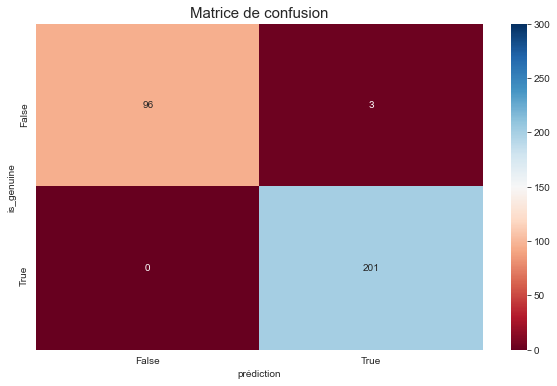

In [32]:
#matrice de confusion
matrice_confusion = pd.crosstab(ytest, xtest['is_genuine'])
# Résultat avec une heatmap
plt.figure(figsize=(10,6))
sns.heatmap(matrice_confusion, cmap='RdBu', vmin=0, vmax=300, annot=True, fmt='d')
plt.title('Matrice de confusion', fontsize=15)
plt.xlabel('prédiction')
plt.show()

## Indicateurs de performance

In [33]:
# Test de la qualité de prédiction
print(metrics.classification_report(ytest,xtest['is_genuine']))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        99
        True       0.99      1.00      0.99       201

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



# Fichier billets_production

## Importation du fichier

In [34]:
# Importation
billets_prodRegLog = pd.read_csv('billets_production.csv')
# Résultat
billets_prodRegLog

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [35]:
# Dimensions
billets_prodRegLog.shape

(5, 7)

In [36]:
# Information
billets_prodRegLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


## Lancement du modèle sur le df

### Préparation du dataset

In [37]:
# Je conserve uniquement les variables significatives 
xprod = billets_prodRegLog[['margin_low','margin_up','length']]

In [38]:
# Transformation du jeu de production
X_scaled_prod = std_scale.transform(xprod)
# Statistiques descriptives
print(scipy.stats.describe(X_scaled_prod,axis=0,ddof=0))

DescribeResult(nobs=5, minmax=(array([ 2.67099952, -2.19402848, -1.42558135]), array([12.2893582 , -1.64669598,  0.76900541])), mean=array([ 7.46723936, -1.87779192, -0.38918488]), variance=array([10.42191963,  0.03766851,  0.85017525]), skewness=array([-0.01308132, -0.51436185,  0.20488916]), kurtosis=array([-0.99821002, -1.12905757, -1.74065135]))


Les moyennes sont quasi nulles et les écarts-type sont de 1. **Le centrage et la réduction ont bien fonctionné.**

### Prédiction

In [39]:
# Stockage des résulats dans une colonne du df
billets_prodRegLog['is_genuine'] = res.predict(X_scaled_prod)
# Résultat
billets_prodRegLog

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


### Probabilité des résultats

J'ajoute à mon df deux colonnes en lien avec la performance du modèle. Une colonne avec le pourcentage de probabilité True et une avec le pourcentage de probabilité False.

In [40]:
# Calcul des probabilités d'affectations
proba_prod = res.predict_proba(X_scaled_prod)*100
# Ajout au df avec une concaténation
billets_prodRegLog = pd.concat([billets_prodRegLog, pd.DataFrame(proba_prod)], axis=1)
# Résultat
billets_prodRegLog

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,0,1
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,99.999997,2.680303e-06
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,100.000000,1.016551e-07
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,99.999971,2.946086e-05
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,10.532875,8.946712e+01
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.024250,9.997575e+01


In [41]:
# Renommage des colonnes
billets_prodRegLog = billets_prodRegLog.rename(columns={0:'Proba_False(%)',1:'Proba_True(%)'})
# Résultat
billets_prodRegLog

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,Proba_False(%),Proba_True(%)
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,99.999997,2.680303e-06
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,100.000000,1.016551e-07
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,99.999971,2.946086e-05
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,10.532875,8.946712e+01
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.024250,9.997575e+01


In [42]:
# Mise en index de la colonne 'id'
billets_prodRegLog = billets_prodRegLog.set_index('id')
# Résultat
billets_prodRegLog

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,Proba_False(%),Proba_True(%)
id,,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,99.999997,2.680303e-06
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,100.000000,1.016551e-07
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,99.999971,2.946086e-05
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,10.532875,8.946712e+01
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,0.024250,9.997575e+01


# Export du df

In [43]:
# Export au format csv
billets_prodRegLog.to_csv('billets_prodSk.csv')